# Midterm Presentation - The Oscars Winners' Tour
INFO 5871-001
Fall 2019

_Keke Wu_

### Imports

In [1]:
import numpy as np
import numpy.random as rnd
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

### Load the data

In [2]:
oscars_original = pd.read_csv('Oscars-demographics-DFE.csv', encoding = "ISO-8859-1", parse_dates=True)
for col in oscars_original.columns: 
    print(col) 

_unit_id
_golden
_unit_state
_trusted_judgments
_last_judgment_at
birthplace
birthplace:confidence
date_of_birth
date_of_birth:confidence
race_ethnicity
race_ethnicity:confidence
religion
religion:confidence
sexual_orientation
sexual_orientation:confidence
year_of_award
year_of_award:confidence
award
biourl
birthplace_gold
date_of_birth_gold
movie
person
race_ethnicity_gold
religion_gold
sexual_orientation_gold
year_of_award_gold


### Data Preparation

#### _Construct a new dataframe that contains only columns of interest_

In [3]:
oscars = pd.DataFrame(oscars_original, columns=['_golden', 'birthplace', 'race_ethnicity' , 'date_of_birth', 'year_of_award', 'award', 'movie', 'person'])
oscars.head()

,_golden,birthplace,race_ethnicity,date_of_birth,year_of_award,award,movie,person
0,False,"Chisinau, Moldova",White,30-Sep-1895,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,False,"Glasgow, Scotland",White,2-Feb-1886,1930,Best Director,The Divine Lady,Frank Lloyd
2,False,"Chisinau, Moldova",White,30-Sep-1895,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,False,"Chicago, Il",White,23-Feb-1899,1932,Best Director,Skippy,Norman Taurog
4,False,"Salt Lake City, Ut",White,23-Apr-1894,1933,Best Director,Bad Girl,Frank Borzage


In [4]:
oscars.shape

(441, 8)

### Q1: Univariate - Race & Ethinicity

#### _* Oscars winners distribution by race & ethnicity_
#### _* Plot with a pie chart_

In [5]:
race_counts = oscars.race_ethnicity.value_counts()
race_counts

White             411
Black              15
Hispanic            8
Asian               4
Multiracial         2
Middle Eastern      1
Name: race_ethnicity, dtype: int64

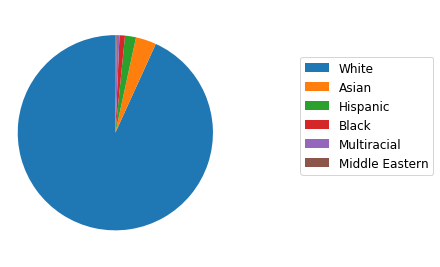

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
race_dict = dict.fromkeys(oscars.race_ethnicity)
labels = list(race_dict)
sizes = list(race_counts)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, bbox_to_anchor=(1,0.5), loc="right", fontsize=12, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5)
plt.show();

### Q1: Univariate - Award

#### _* Oscars winners distribution by award category_
#### _* Combine the actress & supporting actress, actor & supporting actor_
#### _* Compute the possibility of winning both Oscars and Golden Globe Award_
#### _* Compute the possibility of a movie winning multiple Oscars_

In [7]:
oscars.award.value_counts()

Best Actress               95
Best Director              91
Best Actor                 88
Best Supporting Actress    85
Best Supporting Actor      82
Name: award, dtype: int64

In [8]:
# oscars['award_combined'] = 'Best Director'
# female_filter = oscars.award.str.contains('Actress')
# oscars.loc[female_filter, 'award_combined'] = 'Best Actress'
# male_filter = oscars.award.str.contains('Actor')
# oscars.loc[male_filter, 'award_combined'] = 'Best Actor'

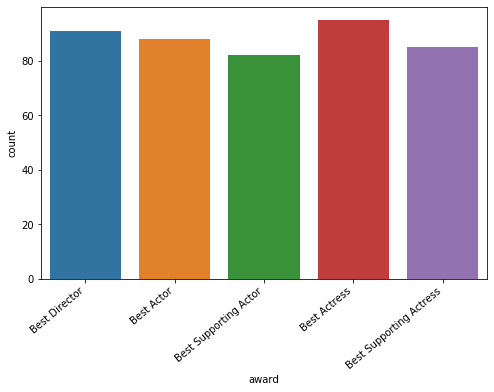

In [9]:
plt.figure(figsize=(8,5))
ax = sns.countplot(oscars.award);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [10]:
golden_global = oscars[oscars._golden == True].copy()
golden_oscar = len(golden_global) / len(oscars)
print("The chance of winning both the Oscars and the Golden Globe Award is" + " {:.2%}".format(golden_oscar));

The chance of winning both the Oscars and the Golden Globe Award is 5.67%


### Q2: Bivariate - Movies that won multiple Oscars awards

In [13]:
# golden_global['date_of_birth'] = pd.to_datetime(golden_global['date_of_birth'], format = "%d-%b-%y")
# golden_global['year_of_birth'] = golden_global['date_of_birth'].dt.year
# golden_global['age'] = golden_global['year_of_award'] - golden_global['year_of_birth']
# filterinfDataframe = golden_global[(golden_global['age'] > 0)]
# filterinfDataframe 

In [11]:
multiple_oscars = oscars[oscars.duplicated(['movie'])]
multioscars_movies = []
for i in multiple_oscars['movie']:
    if i not in multioscars_movies:
        multioscars_movies.append(i)
multioscars_rate = len(multioscars_movies) / len(oscars)
print("The chance of a movie winning multiple Oscars award is" + " {:.2%}".format(multioscars_rate));

The chance of a movie winning multiple Oscars award is 18.59%
